In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_csv('C:/Users/Shalini Maurya/Desktop/dataset/Bigdatamart-train.csv')
data_test=pd.read_csv('C:/Users/Shalini Maurya/Desktop/dataset/Bigdatamart-test.csv')

In [3]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
dt=data_train.copy()

In [6]:
dts=data_test.copy()

# EDA

In [7]:
dt.shape

(8523, 12)

In [8]:
dts.shape

(5681, 11)

In [9]:
dt.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
dts.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [15]:
dt.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
dts.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [17]:
dt.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
dts.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [19]:
dt['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
dts['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [20]:
dt.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
dts.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [22]:
dt.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [23]:
dts.Item_Type.unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [24]:
dt.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [25]:
dts.Outlet_Size.unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [26]:
dt.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [27]:
dts.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [28]:
dt.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [29]:
dts.Outlet_Type.unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [30]:
dt.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [31]:
dts.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,2,NaN,16,NaN,10,NaN,3,3,4
top,DRF48,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3668,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


# Univariate Analysis

In [32]:
dt.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

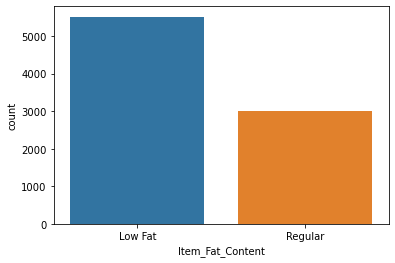

In [33]:
sns.countplot(dt['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

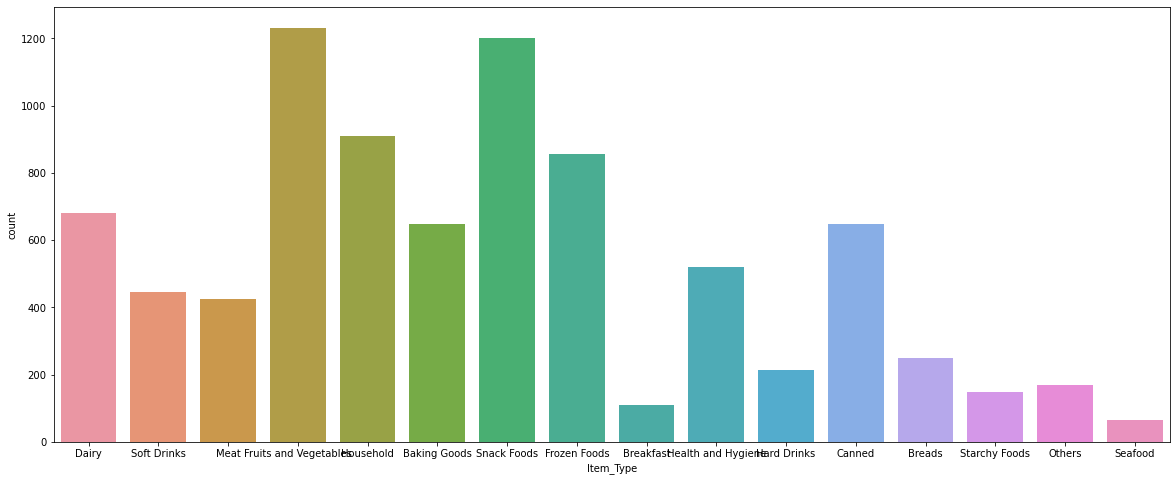

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(dt['Item_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

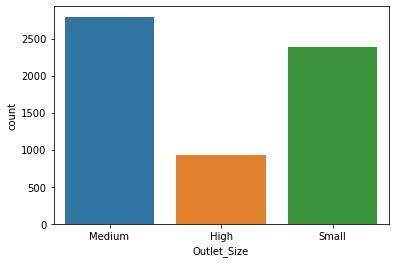

In [35]:
sns.countplot(dt['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

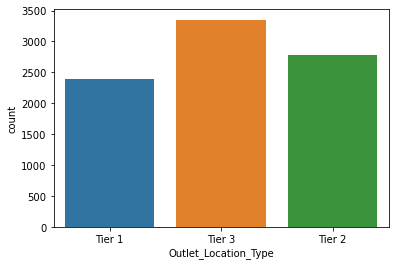

In [36]:
sns.countplot(dt['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

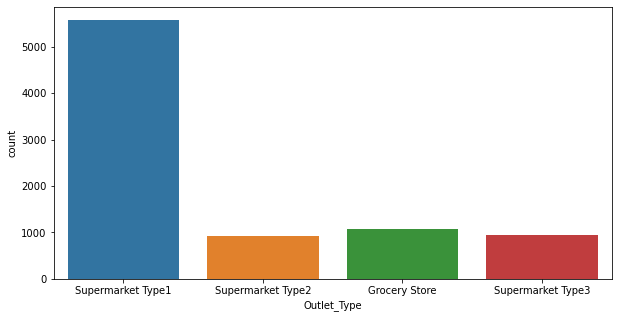

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(dt['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

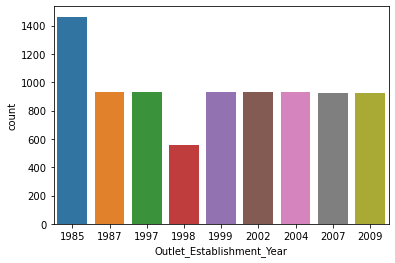

In [38]:
sns.countplot(dt['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

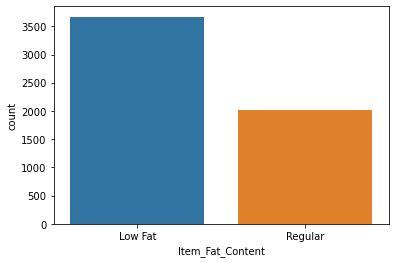

In [39]:
# test data
sns.countplot(dts['Item_Fat_Content'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

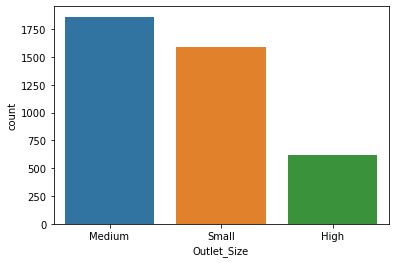

In [40]:
sns.countplot(dts['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

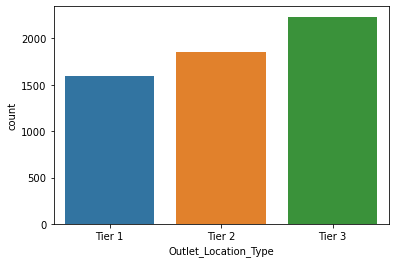

In [41]:
sns.countplot(dts['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

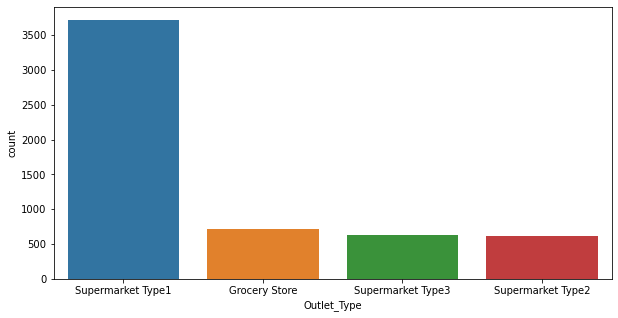

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(dts['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

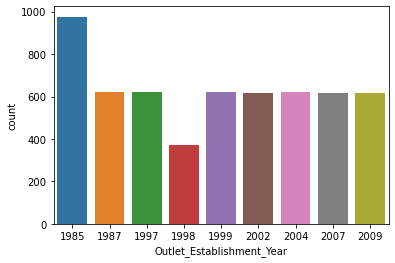

In [43]:
sns.countplot(dts['Outlet_Establishment_Year'])

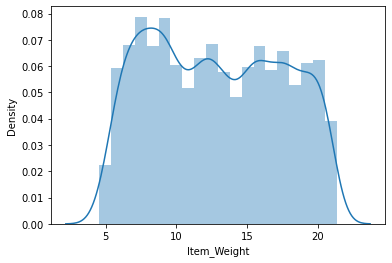

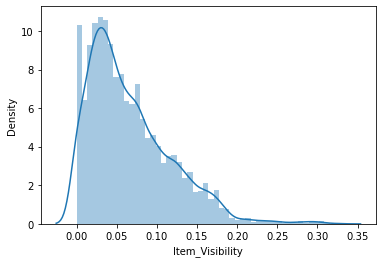

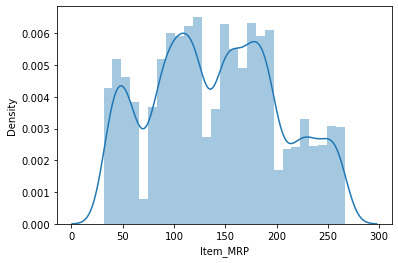

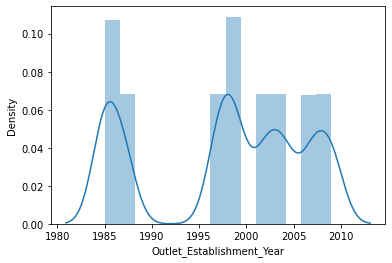

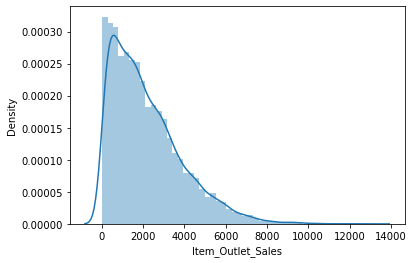

In [44]:
#train data
list1=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

for i in list1:
    sns.distplot(dt[i])
    plt.show()

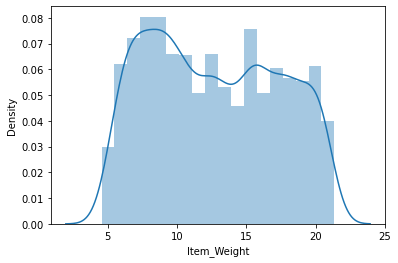

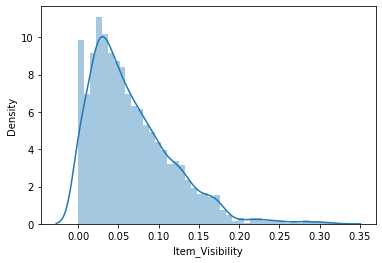

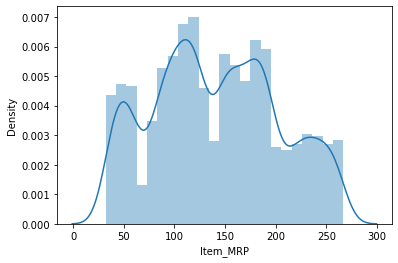

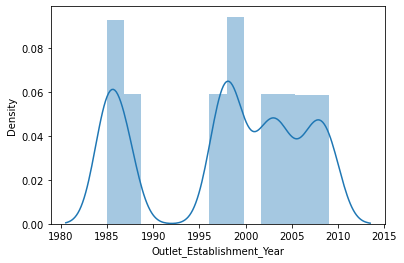

In [45]:
# test data
li=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']

for i in li:
    sns.distplot(dts[i])
    plt.show()

# Bivariate Analysis

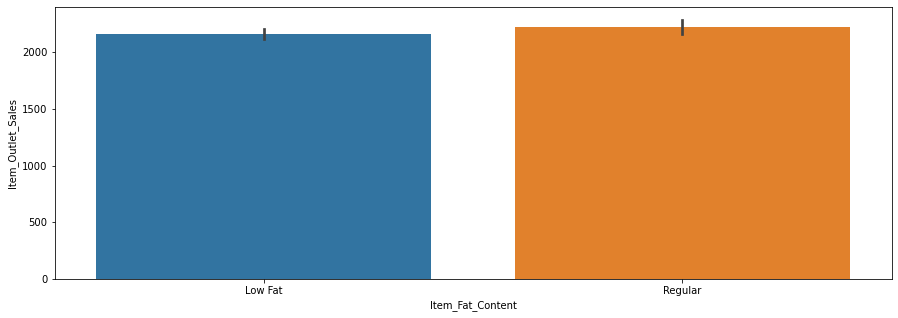

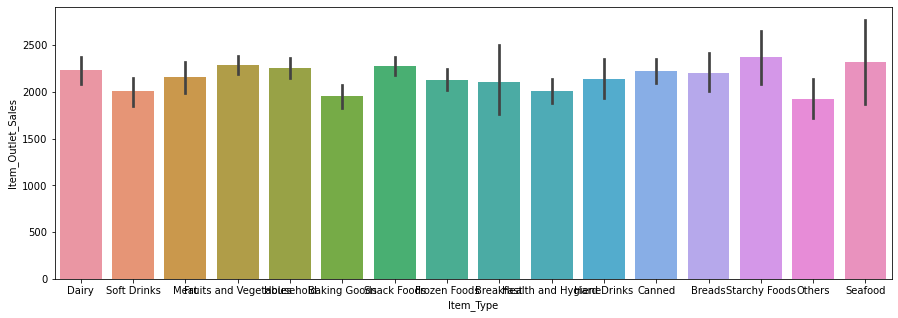

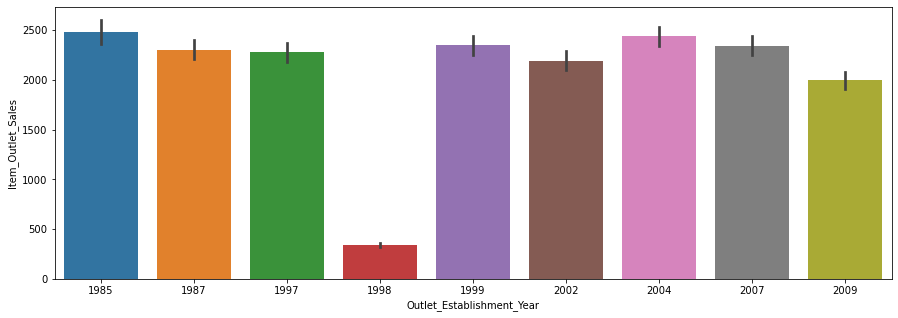

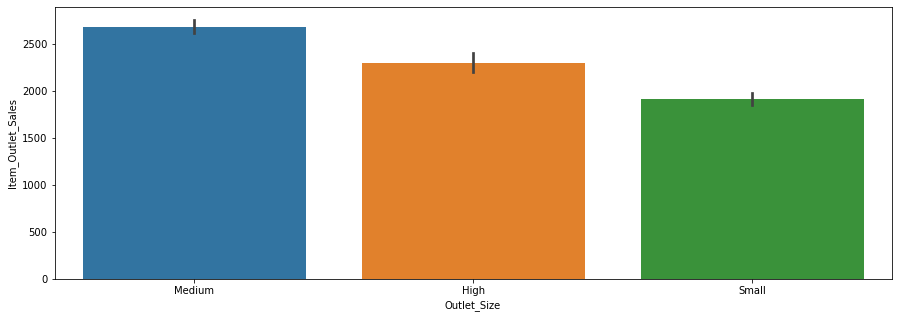

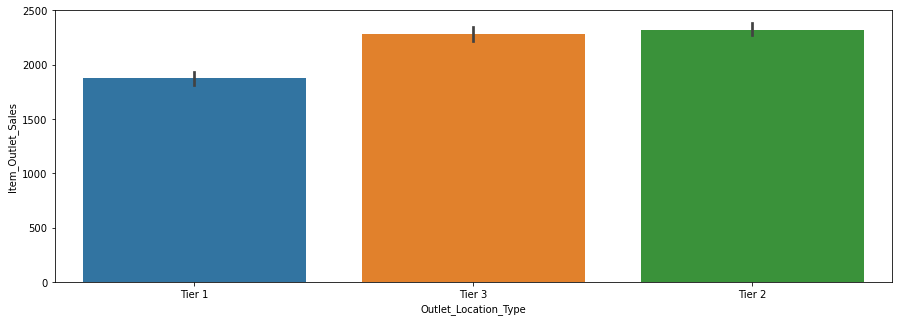

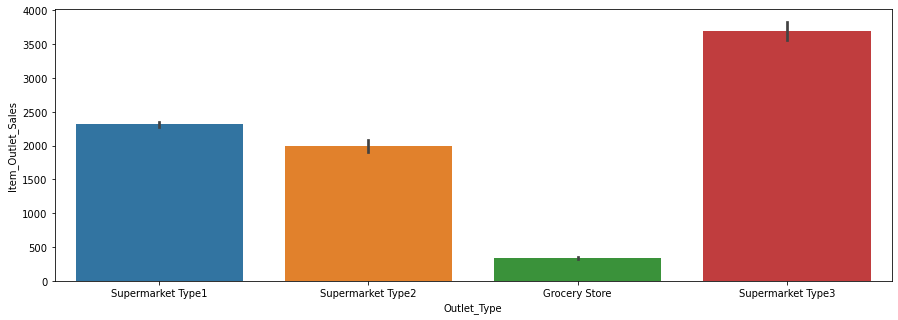

In [46]:
list1=['Item_Fat_Content','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type',]

for i in list1:
    plt.figure(figsize=(15,5))
    sns.barplot(dt[i],dt['Item_Outlet_Sales'])
    plt.show()

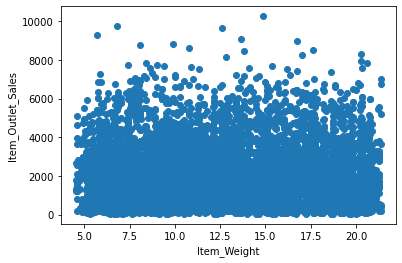

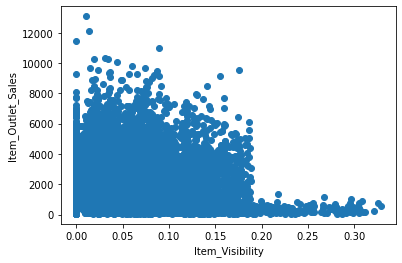

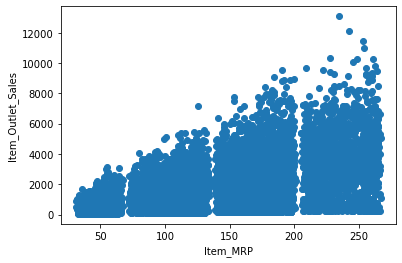

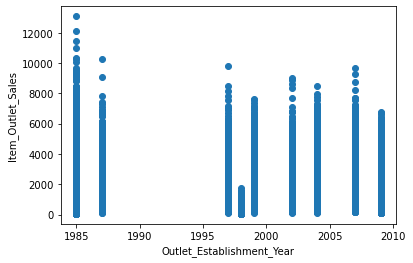

In [48]:
list2=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']

for i in list2:
    plt.scatter(dt[i],dt['Item_Outlet_Sales'])
    plt.xlabel(i)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

# Multivariate Analysis

<AxesSubplot:>

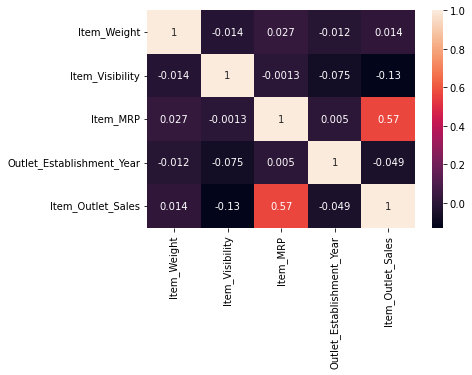

In [49]:
#train Data
sns.heatmap(dt.corr(),annot=True)

<AxesSubplot:>

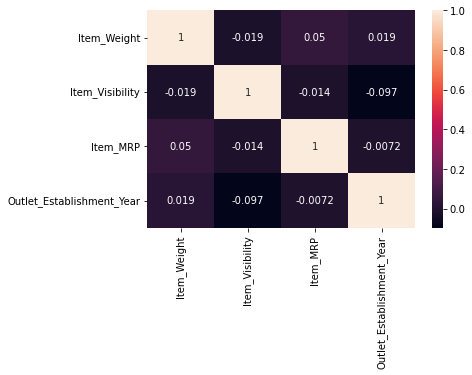

In [51]:
# test data
sns.heatmap(dts.corr(),annot=True)

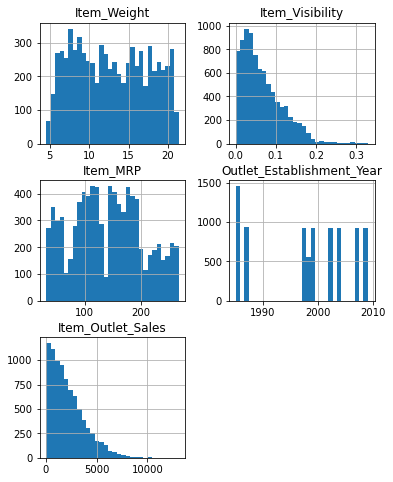

In [52]:
dt.hist(bins=30,figsize=(6,8))
plt.show()

# Data Cleaning Processes

In [53]:
# filling null values in training data

dt['Item_Weight']=dt['Item_Weight'].fillna(dt['Item_Weight'].mean())
dt['Outlet_Size']=dt['Outlet_Size'].fillna(dt['Outlet_Size'].mode()[0])

In [54]:
dt.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [55]:
# filling null values in testing data


dts['Item_Weight']=dts['Item_Weight'].fillna(dts['Item_Weight'].mean())
dts['Outlet_Size']=dts['Outlet_Size'].fillna(dts['Outlet_Size'].mode()[0])

In [56]:
dts.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Checking for the outliers

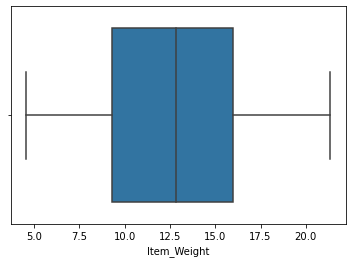

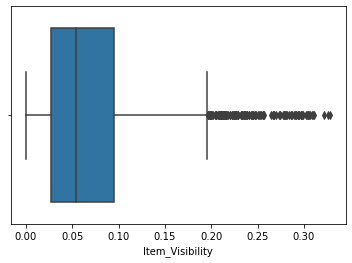

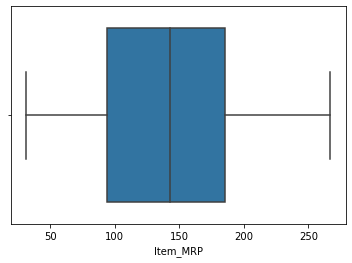

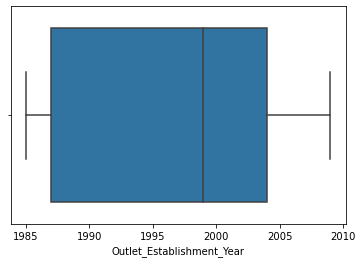

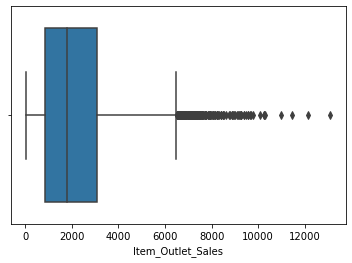

In [57]:
#train Data
list3=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

for i in list3:
    sns.boxplot(dt[i])
    plt.show()

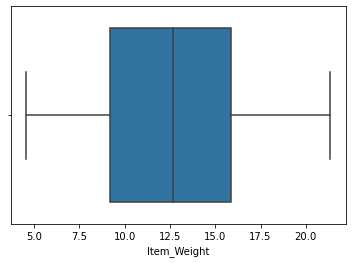

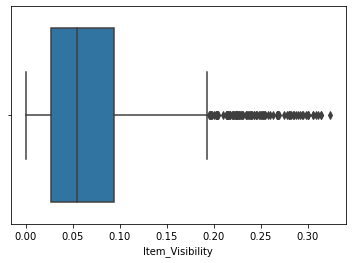

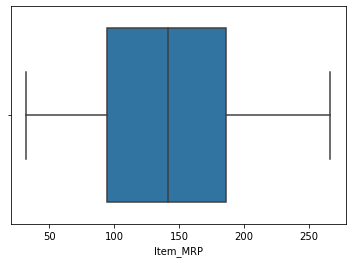

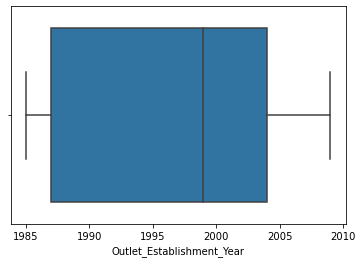

In [58]:
# test data
list4=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year',]

for i in list4:
    sns.boxplot(dts[i])
    plt.show()

In [59]:
from scipy.stats import zscore

In [60]:
z=np.abs(zscore(dt.iloc[:,3:4]))
z       

,Item_Visibility
0,0.970732
1,0.908111
2,0.956917
3,1.281758
4,1.281758
...,...
8518,0.181193
8519,0.371154
8520,0.599784
8521,1.532880


In [61]:
dt_new=dt[(z<3).all(axis=1)]

In [62]:
dt_new.shape

(8428, 12)

In [63]:
dt.shape

(8523, 12)

In [64]:
((8523-8428)/8523)*100

1.1146309984747156

In [65]:
dt_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


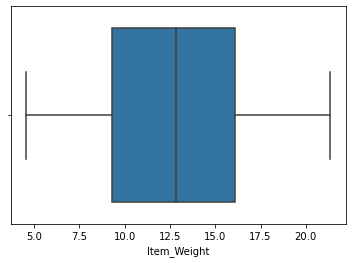

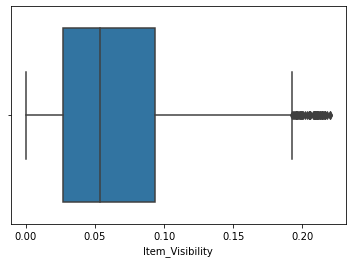

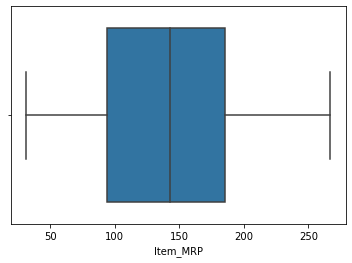

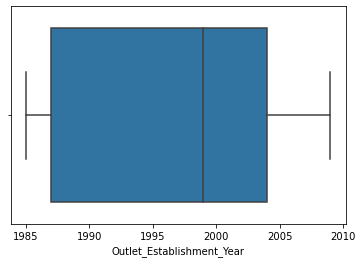

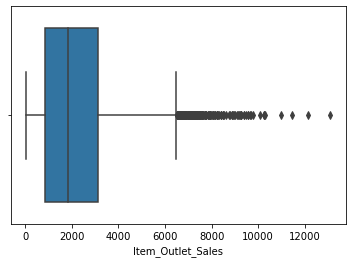

In [66]:
list3=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

for i in list3:
    sns.boxplot(dt_new[i])
    plt.show()

In [67]:
dt1=dt_new.copy()

In [68]:
# test data
z=np.abs(zscore(dts.iloc[:,3:4]))
z

,Item_Visibility
0,1.134077
1,0.531850
2,0.661316
3,0.981416
4,1.032540
...,...
5676,1.018333
5677,1.508493
5678,0.153074
5679,1.281690


In [69]:
dts_new=dts[(z<3).all(axis=1)]

In [70]:
dts_new.shape

(5600, 11)

In [71]:
dts.shape

(5681, 11)

In [72]:
dts1=dts_new.copy()

<AxesSubplot:xlabel='Item_Visibility'>

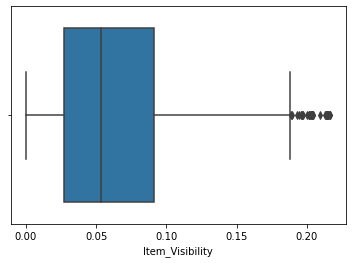

In [73]:
sns.boxplot(dts1['Item_Visibility'])

# Checking for skewness

In [74]:
dt1.skew()

Item_Weight                  0.089907
Item_Visibility              0.795956
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

In [75]:
dt1['Item_Visibility']=np.sqrt(dt1['Item_Visibility'])

In [76]:
dt1.skew()

Item_Weight                  0.089907
Item_Visibility             -0.245750
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

In [77]:
dt1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.238293,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.216754,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.187580,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.381078,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [78]:
# test data

dts1.skew()

Item_Weight                  0.140901
Item_Visibility              0.787861
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

In [79]:
dts1['Item_Visibility']=np.sqrt(dts1['Item_Visibility'])

In [80]:
dts1.skew()

Item_Weight                  0.140901
Item_Visibility             -0.283345
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

# Encoding and Feature Engineering

In [81]:
oen=OrdinalEncoder()

In [82]:
for i in dt1.columns:
    if dt1[i].dtypes=='object':
        dt1[i]=oen.fit_transform(dt1[i].values.reshape(-1,1))

In [83]:
dt1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0.0,0.126678,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,1.0,0.138846,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,0.0,0.129461,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.238293,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,1.0,0.216754,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,0.0,0.187580,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,1.0,0.381078,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [84]:
dt1=pd.get_dummies(dt1,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [85]:
dt1

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0
0,156.0,9.300,0.126678,4.0,249.8092,9.0,1999,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0
1,8.0,5.920,0.138846,14.0,48.2692,3.0,2009,443.4228,0,1,0,1,0,0,0,1,0,0,1,0
2,662.0,17.500,0.129461,10.0,141.6180,9.0,1999,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0
3,1121.0,19.200,0.000000,6.0,182.0950,0.0,1998,732.3800,0,1,0,1,0,0,0,1,1,0,0,0
4,1297.0,8.930,0.000000,9.0,53.8614,1.0,1987,994.7052,1,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.238293,13.0,214.5218,1.0,1987,2778.3834,1,0,1,0,0,0,0,1,0,1,0,0
8519,897.0,8.380,0.216754,0.0,108.1570,7.0,2002,549.2850,0,1,0,1,0,0,1,0,0,1,0,0
8520,1357.0,10.600,0.187580,8.0,85.1224,6.0,2004,1193.1136,1,0,0,0,1,0,1,0,0,1,0,0
8521,681.0,7.210,0.381078,13.0,103.1332,3.0,2009,1845.5976,0,1,0,1,0,0,0,1,0,0,1,0


In [86]:
dt1['Outlet_Years']=2021-dt1['Outlet_Establishment_Year']

In [87]:
dt1

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0.0,Item_Fat_Content_1.0,...,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0,Outlet_Years
0,156.0,9.300,0.126678,4.0,249.8092,9.0,1999,3735.1380,1,0,...,1,0,1,0,0,0,1,0,0,22
1,8.0,5.920,0.138846,14.0,48.2692,3.0,2009,443.4228,0,1,...,1,0,0,0,1,0,0,1,0,12
2,662.0,17.500,0.129461,10.0,141.6180,9.0,1999,2097.2700,1,0,...,1,0,1,0,0,0,1,0,0,22
3,1121.0,19.200,0.000000,6.0,182.0950,0.0,1998,732.3800,0,1,...,1,0,0,0,1,1,0,0,0,23
4,1297.0,8.930,0.000000,9.0,53.8614,1.0,1987,994.7052,1,0,...,0,0,0,0,1,0,1,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.238293,13.0,214.5218,1.0,1987,2778.3834,1,0,...,0,0,0,0,1,0,1,0,0,34
8519,897.0,8.380,0.216754,0.0,108.1570,7.0,2002,549.2850,0,1,...,1,0,0,1,0,0,1,0,0,19
8520,1357.0,10.600,0.187580,8.0,85.1224,6.0,2004,1193.1136,1,0,...,0,1,0,1,0,0,1,0,0,17
8521,681.0,7.210,0.381078,13.0,103.1332,3.0,2009,1845.5976,0,1,...,1,0,0,0,1,0,0,1,0,12


In [88]:
# test data

for i in dts1.columns:
    if dts1[i].dtypes=='object':
        dts1[i]=oen.fit_transform(dts1[i].values.reshape(-1,1)) 

In [89]:
dts1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1102.0,20.750000,0.0,0.086976,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1066.0,8.300000,1.0,0.196030,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,1405.0,14.600000,0.0,0.315555,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,0.0,0.124050,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1183.0,12.695633,1.0,0.344383,4.0,234.2300,5.0,1985,1.0,2.0,3.0


In [90]:
dts1=pd.get_dummies(dts1,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [91]:
dts1['Outlet_Years']=2021-dts1['Outlet_Establishment_Year']

In [92]:
dts1

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0,Outlet_Years
0,1102.0,20.750000,0.086976,13.0,107.8622,9.0,1999,1,0,0,1,0,1,0,0,0,1,0,0,22
1,1066.0,8.300000,0.196030,4.0,87.3198,2.0,2007,0,1,0,1,0,0,1,0,0,1,0,0,14
2,1405.0,14.600000,0.315555,11.0,241.7538,0.0,1998,1,0,0,1,0,0,0,1,1,0,0,0,23
3,809.0,7.315000,0.124050,13.0,155.0340,2.0,2007,1,0,0,1,0,0,1,0,0,1,0,0,14
4,1183.0,12.695633,0.344383,4.0,234.2300,5.0,1985,0,1,0,1,0,0,0,1,0,0,0,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,0.116174,13.0,141.3154,8.0,1997,0,1,0,0,1,1,0,0,0,1,0,0,24
5677,306.0,7.600000,0.378141,15.0,169.1448,3.0,2009,0,1,0,1,0,0,0,1,0,0,1,0,12
5678,1411.0,10.000000,0.271162,8.0,118.7440,7.0,2002,1,0,0,1,0,0,1,0,0,1,0,0,19
5679,517.0,15.300000,0.000000,3.0,214.6218,2.0,2007,0,1,0,1,0,0,1,0,0,1,0,0,14


In [93]:
dts1=dts1.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'])

In [94]:
dts1.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0,Outlet_Years
0,20.750000,0.086976,13.0,107.8622,1,0,0,1,0,1,0,0,0,1,0,0,22
1,8.300000,0.196030,4.0,87.3198,0,1,0,1,0,0,1,0,0,1,0,0,14
2,14.600000,0.315555,11.0,241.7538,1,0,0,1,0,0,0,1,1,0,0,0,23
3,7.315000,0.124050,13.0,155.0340,1,0,0,1,0,0,1,0,0,1,0,0,14
4,12.695633,0.344383,4.0,234.2300,0,1,0,1,0,0,0,1,0,0,0,1,36


# Spliting the data into training and testing

In [95]:
x=dt1.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'])
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0,Outlet_Years
0,9.300,0.126678,4.0,249.8092,1,0,0,1,0,1,0,0,0,1,0,0,22
1,5.920,0.138846,14.0,48.2692,0,1,0,1,0,0,0,1,0,0,1,0,12
2,17.500,0.129461,10.0,141.6180,1,0,0,1,0,1,0,0,0,1,0,0,22
3,19.200,0.000000,6.0,182.0950,0,1,0,1,0,0,0,1,1,0,0,0,23
4,8.930,0.000000,9.0,53.8614,1,0,1,0,0,0,0,1,0,1,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.238293,13.0,214.5218,1,0,1,0,0,0,0,1,0,1,0,0,34
8519,8.380,0.216754,0.0,108.1570,0,1,0,1,0,0,1,0,0,1,0,0,19
8520,10.600,0.187580,8.0,85.1224,1,0,0,0,1,0,1,0,0,1,0,0,17
8521,7.210,0.381078,13.0,103.1332,0,1,0,1,0,0,0,1,0,0,1,0,12


In [96]:
y=dt1['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8428, dtype: float64

# Scaling the data

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
ss=StandardScaler()

In [99]:
x['Item_Weight']=ss.fit_transform(x['Item_Weight'].values.reshape(-1,1))

In [100]:
x['Item_Type']=ss.fit_transform(x['Item_Type'].values.reshape(-1,1))

In [101]:
x['Item_MRP']=ss.fit_transform(x['Item_MRP'].values.reshape(-1,1))

In [102]:
x['Outlet_Years']=ss.fit_transform(x['Outlet_Years'].values.reshape(-1,1))

In [103]:
x['Item_Visibility']=ss.fit_transform(x['Item_Visibility'].values.reshape(-1,1))

In [104]:
x.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0,Outlet_Years
0,-0.840328,-1.002193,-0.767129,1.747048,1,0,0,1,0,1,0,0,0,1,0,0,-0.130236
1,-1.637895,-0.884806,1.609842,-1.488774,0,1,0,1,0,0,0,1,0,0,1,0,-1.326952
2,1.094597,-0.975347,0.659054,0.009986,1,0,0,1,0,1,0,0,0,1,0,0,-0.130236
3,1.495740,-2.224262,-0.291735,0.659864,0,1,0,1,0,0,0,1,1,0,0,0,-0.010564
4,-0.927636,-2.224262,0.421357,-1.398988,1,0,1,0,0,0,0,1,0,1,0,0,1.305823


In [105]:
# test data
dts1['Item_Weight']=ss.fit_transform(dts1['Item_Weight'].values.reshape(-1,1))

In [106]:
dts1['Item_Type']=ss.fit_transform(dts1['Item_Type'].values.reshape(-1,1))

In [107]:
dts1['Item_MRP']=ss.fit_transform(dts1['Item_MRP'].values.reshape(-1,1))

In [108]:
dts1['Outlet_Years']=ss.fit_transform(dts1['Outlet_Years'].values.reshape(-1,1))

In [109]:
dts1['Item_Visibility']=ss.fit_transform(dts1['Item_Visibility'].values.reshape(-1,1))

In [110]:
dts1.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0,Outlet_Years
0,1.888840,-1.393223,1.363909,-0.538563,1,0,0,1,0,1,0,0,0,1,0,0,-0.128501
1,-1.032779,-0.324257,-0.767463,-0.871149,0,1,0,1,0,0,1,0,0,1,0,0,-1.085897
2,0.445631,0.847352,0.890271,1.629171,1,0,0,1,0,0,0,1,1,0,0,0,-0.008826
3,-1.263927,-1.029817,1.363909,0.225158,1,0,0,1,0,0,1,0,0,1,0,0,-1.085897
4,-0.001263,1.129926,-0.767463,1.507359,0,1,0,1,0,0,0,1,0,0,0,1,1.546944


In [111]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_sc=r2_score(y_test,pred)
    if r2_sc>maxacc:
        maxacc=r2_sc
        maxrs=i
print('best r2_sc is:',maxacc,' at random state', maxrs)

best r2_sc is: 0.5900919834679261  at random state 115


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=115)

In [113]:
x_train.shape

(6573, 17)

In [114]:
y_train.shape

(6573,)

In [115]:
x_test.shape

(1855, 17)

In [116]:
y_test.shape

(1855,)

# Model Training

In [117]:
lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

0.5900919834679261
1142.3747808383303


In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
crs=cross_val_score(lr,x,y,cv=5)
print(crs.mean())

0.5577719746137386


# Regularization

In [120]:
# lasso
ls=Lasso()
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print(r2_score(y_test,predls))
print(np.sqrt(mean_squared_error(y_test,predls)))

0.5888879904340767
1144.0512579129227


In [121]:
crs=cross_val_score(ls,x,y,cv=5)
print(crs.mean())

0.5572367569661838


In [122]:
# Ridge
rg=Ridge()
rg.fit(x_train,y_train)
predrg=rg.predict(x_test)
print(r2_score(y_test,predrg))
print(np.sqrt(mean_squared_error(y_test,predrg)))

0.5899595593386393
1142.5592926844606


In [123]:
crs=cross_val_score(rg,x,y,cv=5)
print(crs.mean())

0.5578595119428398


In [124]:
# ElasticNet
el=ElasticNet()
el.fit(x_train,y_train)
predel=el.predict(x_test)
print(r2_score(y_test,predel))
print(np.sqrt(mean_squared_error(y_test,predel)))


0.3919119344588732
1391.3892417518543


In [125]:
crs=cross_val_score(el,x,y,cv=5)
print(crs.mean())

0.3845149486199503


In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [127]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print(r2_score(y_test,predrfr))
print(np.sqrt(mean_squared_error(y_test,predrfr)))
crs=cross_val_score(rfr,x,y,cv=5)
print(crs.mean())

0.6022917679553564
1125.2465531780074
0.5450001566359075


In [128]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(r2_score(y_test,predada))
print(np.sqrt(mean_squared_error(y_test,predada)))
crs=cross_val_score(ada,x,y,cv=5)
print(crs.mean())

0.5050027245854237
1255.3557187160802
0.473806807681085


In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [130]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc))
print(np.sqrt(mean_squared_error(y_test,preddtc)))
crs=cross_val_score(dtc,x,y,cv=5)
print(crs.mean())

0.24784342978320062
1547.460342044557
0.1609765872151395


In [131]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
predknr=knr.predict(x_test)
print(r2_score(y_test,predknr))
print(np.sqrt(mean_squared_error(y_test,predknr)))
crs=cross_val_score(knr,x,y,cv=5)
print(crs.mean())

0.5438613407172256
1205.074348203242
0.5014319912564396


In [160]:
from xgboost import XGBRegressor

In [161]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(r2_score(y_test,predxgb))
print(np.sqrt(mean_squared_error(y_test,predxgb)))
crs=cross_val_score(xgb,x,y,cv=5)
print(crs.mean())

0.57238498929627
1166.787780154059
0.51901285357426


# Hyperparameter Tunning using GridSearchCV

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
# linear regression
par={'normalize':[True],'n_jobs':[-1]}
gcv=GridSearchCV(lr,par,cv=10)
gcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'n_jobs': [-1], 'normalize': [True]})

In [134]:
gcv.best_params_

{'n_jobs': -1, 'normalize': True}

In [135]:
gcv.best_score_

0.545976666573127

In [136]:
lr=LinearRegression(n_jobs=-1,normalize=True)

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

0.5902914845676139
1142.0967516796204


In [137]:
# adaboost regressor

par={'n_estimators':(50,100,150,200),'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}

gcv=GridSearchCV(ada,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': (50, 100, 150, 200)})

In [138]:
gcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [139]:
gcv.best_score_

0.5540870861281652

In [140]:
ada=AdaBoostRegressor(n_estimators=50,learning_rate=0.1)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(r2_score(y_test,predada))
print(np.sqrt(mean_squared_error(y_test,predada)))

0.5955710961654916
1134.7142117872022


In [141]:
# decision tree regressor

par={'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter':['best','random'],'max_depth':range(2,10,2)}
gcv=GridSearchCV(dtc,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 10, 2),
                         'splitter': ['best', 'random']})

In [142]:
gcv.best_params_

{'criterion': 'mse', 'max_depth': 6, 'splitter': 'random'}

In [143]:
gcv.best_score_

0.570996611020504

In [144]:
dtc=DecisionTreeRegressor(criterion='mse',max_depth=6,splitter='best')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc))
print(np.sqrt(mean_squared_error(y_test,preddtc)))

0.612893128580297
1110.1478988799506


In [145]:
# kneighbors regressor

par={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
    'n_jobs':[-1],'leaf_size':[30,40,50]}
gcv=GridSearchCV(knr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [146]:
gcv.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_jobs': -1,
 'n_neighbors': 11,
 'weights': 'uniform'}

In [147]:
gcv.best_score_

0.5373515912445532

In [148]:
knr=KNeighborsRegressor(n_neighbors=11,algorithm='auto',leaf_size=30,weights='uniform',n_jobs=-1)
knr.fit(x_train,y_train)
predknr=knr.predict(x_test)
print(r2_score(y_test,predknr))
print(np.sqrt(mean_squared_error(y_test,predknr)))

0.5814416778919886
1154.3656409842629


In [149]:
# random forest regressor

par={'n_estimators':(100,150,200),'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
gcv=GridSearchCV(rfr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200)})

In [150]:
gcv.best_params_

{'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 150}

In [151]:
gcv.best_score_

0.550505524171018

In [152]:
rfr=RandomForestRegressor(criterion='mae',max_features='log2',n_estimators=200)
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print(r2_score(y_test,predrfr))
print(np.sqrt(mean_squared_error(y_test,predrfr)))

0.6105472410918714
1113.5065946917503


In [162]:
# xgbregressor

par={'learning_rate':[0.001,0.01,0.1],'max_depth':range(2,10,2)}
gcv=GridSearchCV(xgb,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', vali

In [163]:
gcv.best_params_

{'learning_rate': 0.1, 'max_depth': 2}

In [164]:
gcv.best_score_

0.5818947644357434

In [165]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=2)
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(r2_score(y_test,predxgb))
print(np.sqrt(mean_squared_error(y_test,predxgb)))

0.6268243470427419
1089.988841012981


xgboost given the best result among all the model, having RMSE=1089.98 which is best among all.

# Saving the model

In [166]:
import joblib

In [167]:
joblib.dump(xgb,'bigmart_xgb.obj')

['bigmart_xgb.obj']

# Loading the model

In [168]:
xgb_for_mart=joblib.load('bigmart_xgb.obj')

In [169]:
final_result=xgb_for_mart.predict(dts1)          # prediction of test dataset
final_result

array([1412.3971 , 1411.1027 ,  688.46936, ..., 1905.2666 , 3587.3406 ,
       1299.3219 ], dtype=float32)